In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('honda_sell_data.csv')
df

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,00830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2018,Honda,Accord Sport,Used,"$19,999",5.0,3234,White,Black,Front-wheel Drive,...,U20361,64719,4.8,4.8,4.7,4.7,4.8,4.8,NY,Dealer
4995,2020,Honda,Fit LX,Used,"$17,495",4.3,54,Red,Black,Front-wheel Drive,...,36117,40902,4.7,4.6,4.7,4.8,4.5,4.8,NY,Dealer
4996,2018,Honda,Civic Sport,Used,"$19,500",4.3,1925,White Orchid Pearl,Beige,Front-wheel Drive,...,NA073727A,82906,4.7,4.7,4.8,4.8,4.9,4.8,CT,Dealer
4997,2011,Honda,Accord EX-L,Used,"$17,998",4.6,4,Black,Black,Front-wheel Drive,...,22941503,88050,4.4,4.5,4.4,4.6,4.5,4.8,MA,Dealer


## Loading of Dataset

### Overview of Dataset

In [3]:
df.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,00830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


In [4]:
df.describe()

,Year,Consumer_Rating,Consumer_Review_#,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating
count,4999.000000,4999.000000,4999.000000,4447.00000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000
mean,2020.507702,4.569654,1288.366673,4.81754,4.706814,4.663931,4.580976,4.731954,4.866269
std,3.711361,0.542453,1969.998095,0.25903,0.476941,0.351680,0.372107,0.313093,0.190886
min,1981.000000,1.200000,0.000000,3.80000,3.000000,3.600000,3.600000,3.900000,4.000000
25%,2019.000000,4.400000,126.000000,4.70000,4.700000,4.500000,4.200000,4.600000,4.800000
50%,2022.000000,4.700000,697.000000,4.90000,4.800000,4.800000,4.600000,4.800000,5.000000
75%,2023.000000,4.900000,1695.500000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2023.000000,5.000000,29258.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Model                    4999 non-null   object 
 3   Condition                4999 non-null   object 
 4   Price                    4999 non-null   object 
 5   Consumer_Rating          4999 non-null   float64
 6   Consumer_Review_#        4999 non-null   int64  
 7   Exterior_Color           4988 non-null   object 
 8   Interior_Color           4988 non-null   object 
 9   Drivetrain               4988 non-null   object 
 10  MPG                      3514 non-null   object 
 11  Fuel_Type                4988 non-null   object 
 12  Transmission             4988 non-null   object 
 13  Engine                   4988 non-null   object 
 14  VIN                     

In [6]:
df.isnull().sum()

Year                          0
Make                          0
Model                         0
Condition                     0
Price                         0
Consumer_Rating               0
Consumer_Review_#             0
Exterior_Color               11
Interior_Color               11
Drivetrain                   11
MPG                        1485
Fuel_Type                    11
Transmission                 11
Engine                       11
VIN                          11
Stock_#                      11
Mileage                      11
Comfort_Rating              552
Interior_Design_Rating      552
Performance_Rating          552
Value_For_Money_Rating      552
Exterior_Styling_Rating     552
Reliability_Rating          552
State                        73
Seller_Type                  73
dtype: int64

### Normalising/Cleaning Dataset

In [7]:
for i in df.columns:
    print(i,'\n')
    print(df[i].value_counts())
    print('---------------------------------------------------------------------------------------------------------')

Year 

2023    1588
2022    1461
2019     402
2020     352
2021     337
2018     207
2017     137
2016     119
2015      79
2014      50
2013      39
2012      35
2011      29
2010      29
2009      28
2008      27
2007      19
2006      16
2005      11
2001       6
2004       5
2002       4
2003       4
1997       3
2000       3
1998       2
1989       1
1987       1
1981       1
1991       1
1992       1
1999       1
1993       1
Name: Year, dtype: int64
---------------------------------------------------------------------------------------------------------
Make 

Honda    4999
Name: Make, dtype: int64
---------------------------------------------------------------------------------------------------------
Model 

CR-V EX-L                    268
Pilot Sport                  228
Pilot EX-L                   204
Accord Sport 1.5T            195
CR-V Hybrid Sport Touring    185
                            ... 
Ridgeline RTX                  1
Odyssey EX-L/RES               1
Accord VP

5.0    2366
4.8     835
4.7     418
4.9     353
4.6     205
4.5      97
4.1      65
4.2      44
4.3      32
4.4      29
4.0       3
Name: Reliability_Rating, dtype: int64
---------------------------------------------------------------------------------------------------------
State 

CA       330
IL       329
FL       323
TX       295
OH       268
NY       198
IN       196
NC       182
VA       162
NJ       153
GA       146
MN       144
PA       140
MO       137
WA       131
TN       126
MA       121
MD       118
WI       104
IA       100
LA        97
KY        94
MI        93
CT        87
AZ        83
CO        83
KS        70
OK        68
NE        65
AL        61
OR        61
AR        57
SC        43
NV        37
WV        29
UT        24
ID        19
ND        19
NH        18
ME        17
SD        17
VT        16
NM        13
DE        12
MT        10
MS         9
AK         7
WY         6
HI         3
RI         2
Route      1
Glens      1
MO-22      1
Name: State, dtype: int64


#### As MPG is in a range value given  so we are spliting it into LOW/CITY MPG and HIGH/HIGHWAY MPG


In [8]:
df[['CITY_MPG','HIGHWAY_MPG']]=df['MPG'].str.split('–',n=1,expand=True)

#### As there are strings in some columns so we replacing with nan values.

In [9]:
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].str.replace(',','')
df['Price'].replace('Not Priced',np.nan,inplace=True)
df['Exterior_Color'].replace('–',np.nan,inplace=True)
df['Interior_Color'].replace('–',np.nan,inplace=True)
df['Drivetrain'].replace('–',np.nan,inplace=True)
df['HIGHWAY_MPG'].replace(0,np.nan,inplace=True)
df['CITY_MPG'].replace(0,np.nan,inplace=True)

#### Changing the D-types wherever required

In [10]:
df['Price']=df['Price'].astype(float)
df['CITY_MPG']=df['CITY_MPG'].astype(float)
df['HIGHWAY_MPG']=df['HIGHWAY_MPG'].astype(float)

In [11]:
df.isnull().sum()

Year                          0
Make                          0
Model                         0
Condition                     0
Price                        39
Consumer_Rating               0
Consumer_Review_#             0
Exterior_Color              107
Interior_Color              721
Drivetrain                   16
MPG                        1485
Fuel_Type                    11
Transmission                 11
Engine                       11
VIN                          11
Stock_#                      11
Mileage                      11
Comfort_Rating              552
Interior_Design_Rating      552
Performance_Rating          552
Value_For_Money_Rating      552
Exterior_Styling_Rating     552
Reliability_Rating          552
State                        73
Seller_Type                  73
CITY_MPG                   1485
HIGHWAY_MPG                1485
dtype: int64

#### Filling the Null values 

In [12]:
df['Comfort_Rating'].fillna(df['Comfort_Rating'].mean(),inplace=True)
df['Interior_Design_Rating'].fillna(df['Interior_Design_Rating'].mean(),inplace=True)
df['Performance_Rating'].fillna(df['Performance_Rating'].mean(),inplace=True)
df['Value_For_Money_Rating'].fillna(df['Value_For_Money_Rating'].mean(),inplace=True)
df['Exterior_Styling_Rating'].fillna(df['Exterior_Styling_Rating'].mean(),inplace=True)
df['Reliability_Rating'].fillna(df['Reliability_Rating'].mean(),inplace=True)
df['CITY_MPG'].fillna(df['CITY_MPG'].mean(),inplace=True)
df['HIGHWAY_MPG'].fillna(df['HIGHWAY_MPG'].mean(),inplace=True)

In [13]:
df.isnull().sum()

Year                          0
Make                          0
Model                         0
Condition                     0
Price                        39
Consumer_Rating               0
Consumer_Review_#             0
Exterior_Color              107
Interior_Color              721
Drivetrain                   16
MPG                        1485
Fuel_Type                    11
Transmission                 11
Engine                       11
VIN                          11
Stock_#                      11
Mileage                      11
Comfort_Rating                0
Interior_Design_Rating        0
Performance_Rating            0
Value_For_Money_Rating        0
Exterior_Styling_Rating       0
Reliability_Rating            0
State                        73
Seller_Type                  73
CITY_MPG                      0
HIGHWAY_MPG                   0
dtype: int64

#### Selecting independent variables which are dependent on dependent variable

In [14]:
corr=df.corr()
corr

,Year,Price,Consumer_Rating,Consumer_Review_#,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,CITY_MPG,HIGHWAY_MPG
Year,1.000000,0.701588,0.063805,0.063126,0.454691,0.108999,0.103273,-0.086504,0.107340,0.419527,0.064292,-0.001410
Price,0.701588,1.000000,0.057310,0.048674,0.550599,0.127798,0.155896,-0.085679,0.101963,0.433149,-0.226854,-0.342739
Consumer_Rating,0.063805,0.057310,1.000000,0.165947,0.045013,0.069526,0.037182,0.026264,0.027083,0.048763,-0.006418,-0.008121
Consumer_Review_#,0.063126,0.048674,0.165947,1.000000,0.023750,-0.008075,-0.016579,-0.032970,-0.022381,0.013221,0.008973,-0.005864
Comfort_Rating,0.454691,0.550599,0.045013,0.023750,1.000000,0.190414,0.520266,0.021781,0.120108,0.548966,-0.137965,-0.202596
Interior_Design_Rating,0.108999,0.127798,0.069526,-0.008075,0.190414,1.000000,0.617695,0.503743,-0.070760,0.239697,-0.069015,-0.051623
Performance_Rating,0.103273,0.155896,0.037182,-0.016579,0.520266,0.617695,1.000000,0.558766,0.294613,0.367080,-0.107992,-0.109310
Value_For_Money_Rating,-0.086504,-0.085679,0.026264,-0.032970,0.021781,0.503743,0.558766,1.000000,0.647910,0.263764,-0.020763,-0.015050
Exterior_Styling_Rating,0.107340,0.101963,0.027083,-0.022381,0.120108,-0.070760,0.294613,0.647910,1.000000,0.243957,0.029061,-0.001426
Reliability_Rating,0.419527,0.433149,0.048763,0.013221,0.548966,0.239697,0.367080,0.263764,0.243957,1.000000,0.038270,-0.023537


In [15]:
df['VIN'].value_counts()

5FPYK3F58PB011817    1
19XZE4F5XLE008265    1
5FNYF6H57MB000346    1
5FNYF8H55NB032404    1
SHHFK7H59JU415672    1
                    ..
JHMBA4239KC055440    1
1HGCV3F19KA012291    1
5FNYF8H55LB008729    1
2HKRS6H92PH800786    1
5FNYG1H88PB000466    1
Name: VIN, Length: 4988, dtype: int64

In [16]:
df['Stock_#'].value_counts()

Adaptive Cruise Control    2
H23100                     2
230134                     2
PB005739                   2
230081                     2
                          ..
65073896                   1
O377332                    1
Q10249                     1
C1440                      1
H000466                    1
Name: Stock_#, Length: 4966, dtype: int64

In [17]:
df['Mileage'].value_counts()

5        463
0        284
–        281
10       232
3        209
        ... 
52027      1
19484      1
87722      1
62359      1
88050      1
Name: Mileage, Length: 2416, dtype: int64

In [18]:
df['Make'].value_counts()

Honda    4999
Name: Make, dtype: int64

In [19]:
df['Seller_Type'].value_counts()

Dealer        4920
Individual       6
Name: Seller_Type, dtype: int64

#### Above information is not much usefull for us in analysis since VIN,Stock_# not useful for analysis , mileage count is not useful and make is unique,MPG is splitted, seller type,Consumer_Rating and Consumer_Review_# are not useful much it will not make any sense in analysis so we will drop these columns in our data to minimize complexity.

In [20]:
df.drop(['VIN','Stock_#','Mileage','Make','MPG','Seller_Type','Consumer_Rating','Consumer_Review_#'],axis=1,inplace=True)

#### Droping the null values

In [21]:
df.dropna(inplace=True)

### Selecting Feature and Target

In [22]:
feature=df.loc[:,df.columns!='Price']
feature

,Year,Model,Condition,Exterior_Color,Interior_Color,Drivetrain,Fuel_Type,Transmission,Engine,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,CITY_MPG,HIGHWAY_MPG
0,2023,Ridgeline RTL,New,Platinum White Pearl,Beige,All-wheel Drive,Gasoline,Automatic,3.5L V6 24V GDI SOHC,5.00000,4.800000,4.800000,4.200000,5.000000,5.000000,CA,24.819579,30.777348
1,2023,CR-V Hybrid Sport,New,Platinum White Pearl,Black,FWD,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,24.819579,30.777348
2,2023,CR-V Hybrid Sport,New,Meteorite Gray Metallic,Black,Front-wheel Drive,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,24.819579,30.777348
3,2022,Pilot TrailSport,New,Sonic Gray Pearl,Black,All-wheel Drive,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,CA,19.000000,25.000000
4,2023,CR-V Hybrid Sport Touring,New,Crystal Black Pearl,Black,All-wheel Drive,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,24.819579,30.777348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2018,Accord Sport,Used,White,Black,Front-wheel Drive,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,4.80000,4.800000,4.700000,4.700000,4.800000,4.800000,NY,29.000000,35.000000
4995,2020,Fit LX,Used,Red,Black,Front-wheel Drive,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC,4.70000,4.600000,4.700000,4.800000,4.500000,4.800000,NY,33.000000,40.000000
4996,2018,Civic Sport,Used,White Orchid Pearl,Beige,Front-wheel Drive,Gasoline,6-Speed Manual,1.5L I4 16V GDI DOHC Turbo,4.70000,4.700000,4.800000,4.800000,4.900000,4.800000,CT,29.000000,38.000000
4997,2011,Accord EX-L,Used,Black,Black,Front-wheel Drive,Gasoline,5-Speed Automatic,3.5L V6 24V MPFI SOHC,4.40000,4.500000,4.400000,4.600000,4.500000,4.800000,MA,20.000000,30.000000


In [23]:
target=df.iloc[:,3]
target

0       46370.0
1       34150.0
2       34245.0
3       46500.0
4       40395.0
         ...   
4994    19999.0
4995    17495.0
4996    19500.0
4997    17998.0
4998    53325.0
Name: Price, Length: 4169, dtype: float64

## Analysis and Visualization

### Model

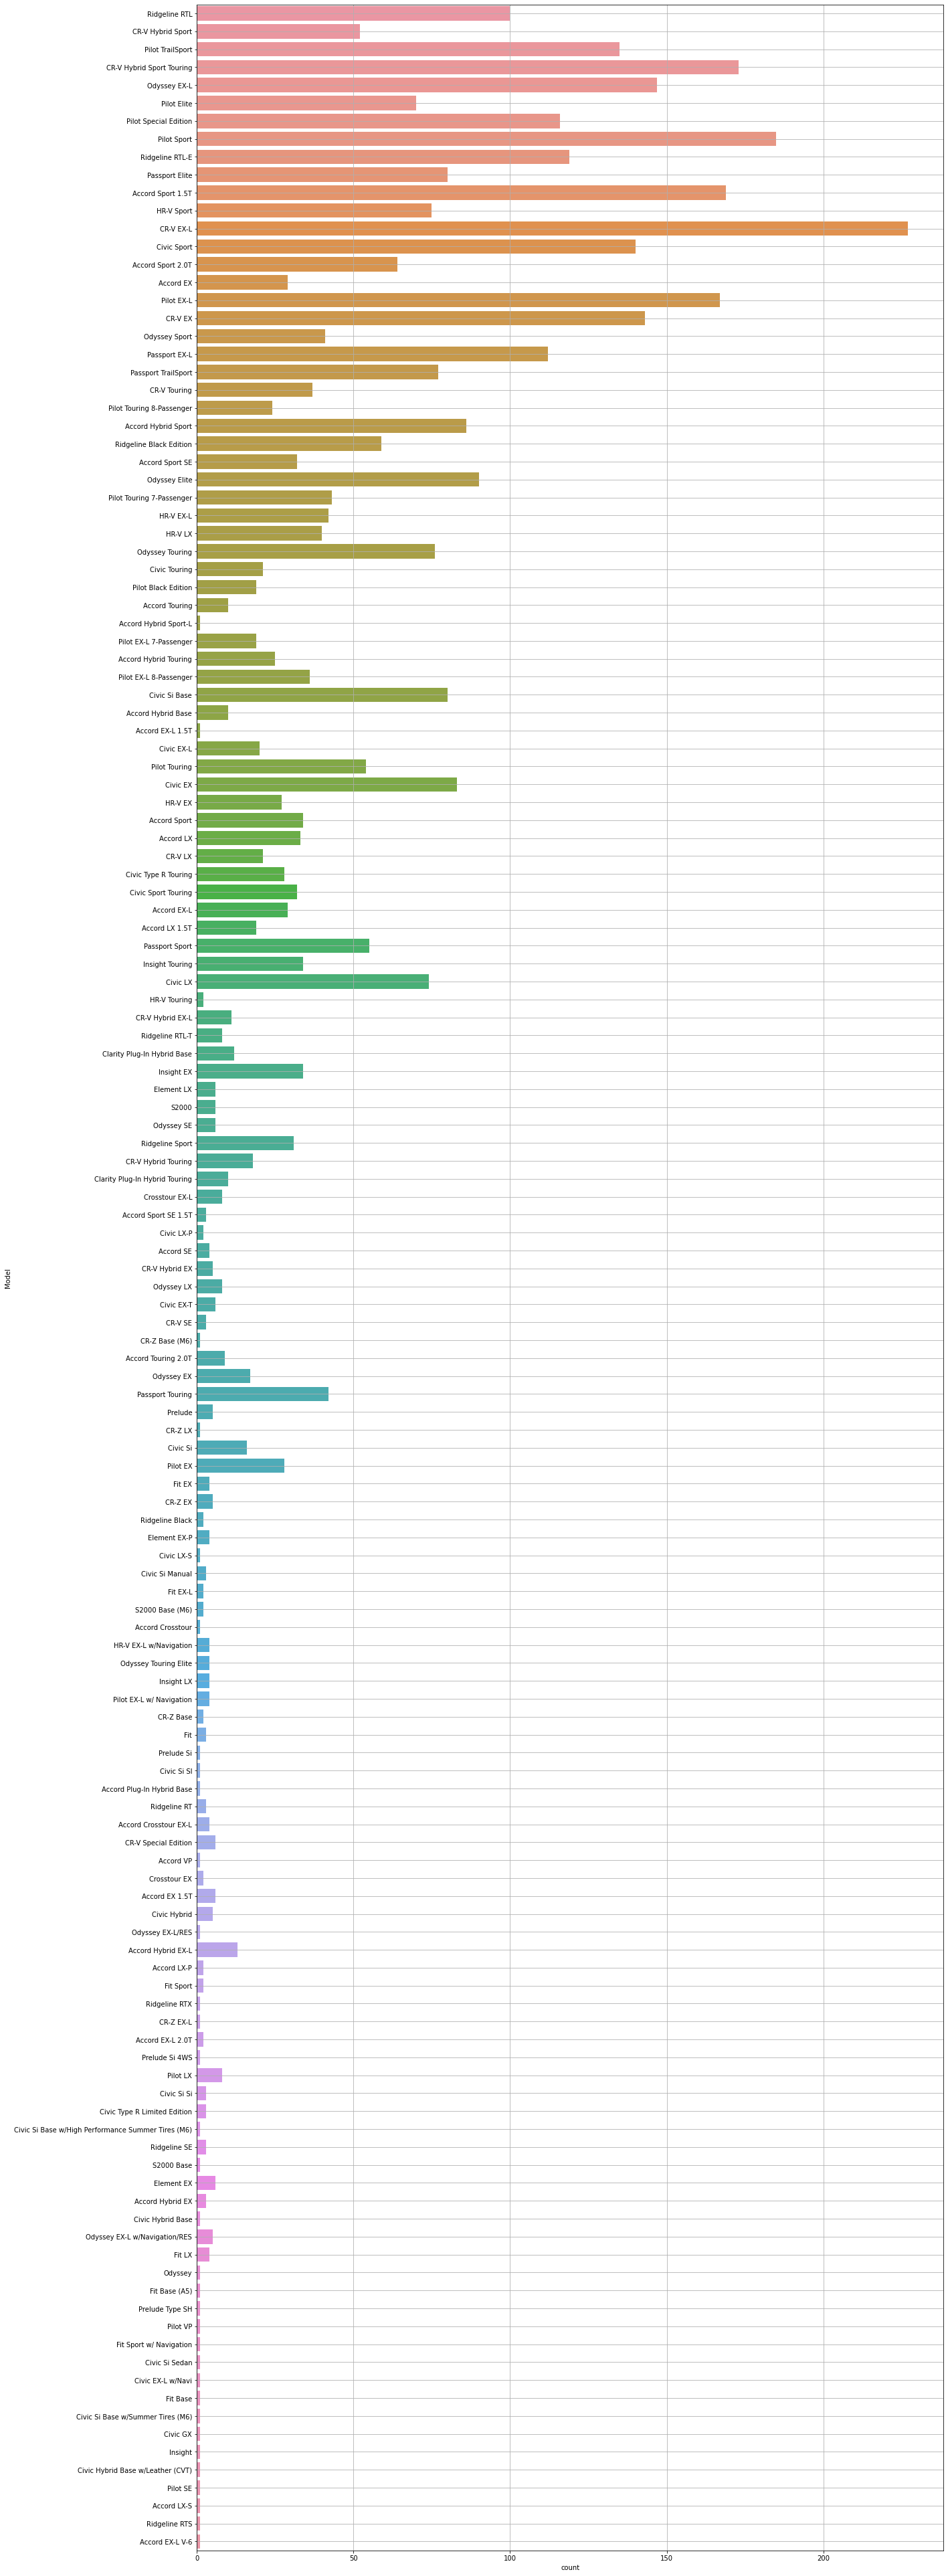

In [24]:
plt.figure(figsize=(20,70))
sns.countplot(data=df,y='Model')
plt.grid(True)
plt.show()

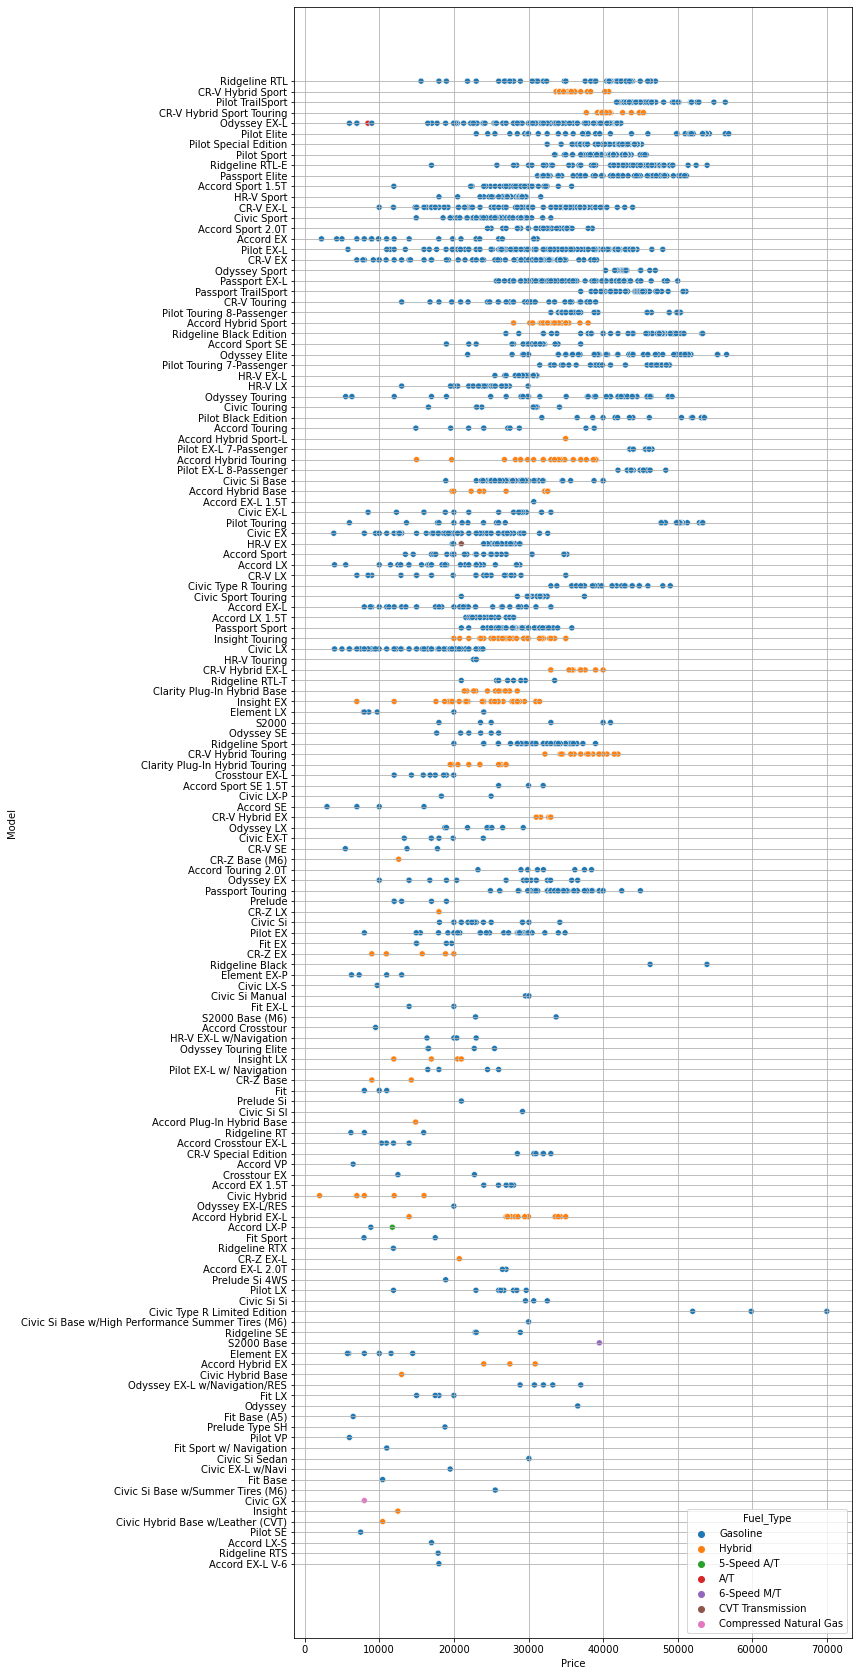

In [25]:
plt.figure(figsize=(10,30))
sns.scatterplot(data=df,x=df['Price'],y=df['Model'],hue='Fuel_Type')
plt.grid(True)
plt.show()

<Figure size 1440x1440 with 0 Axes>

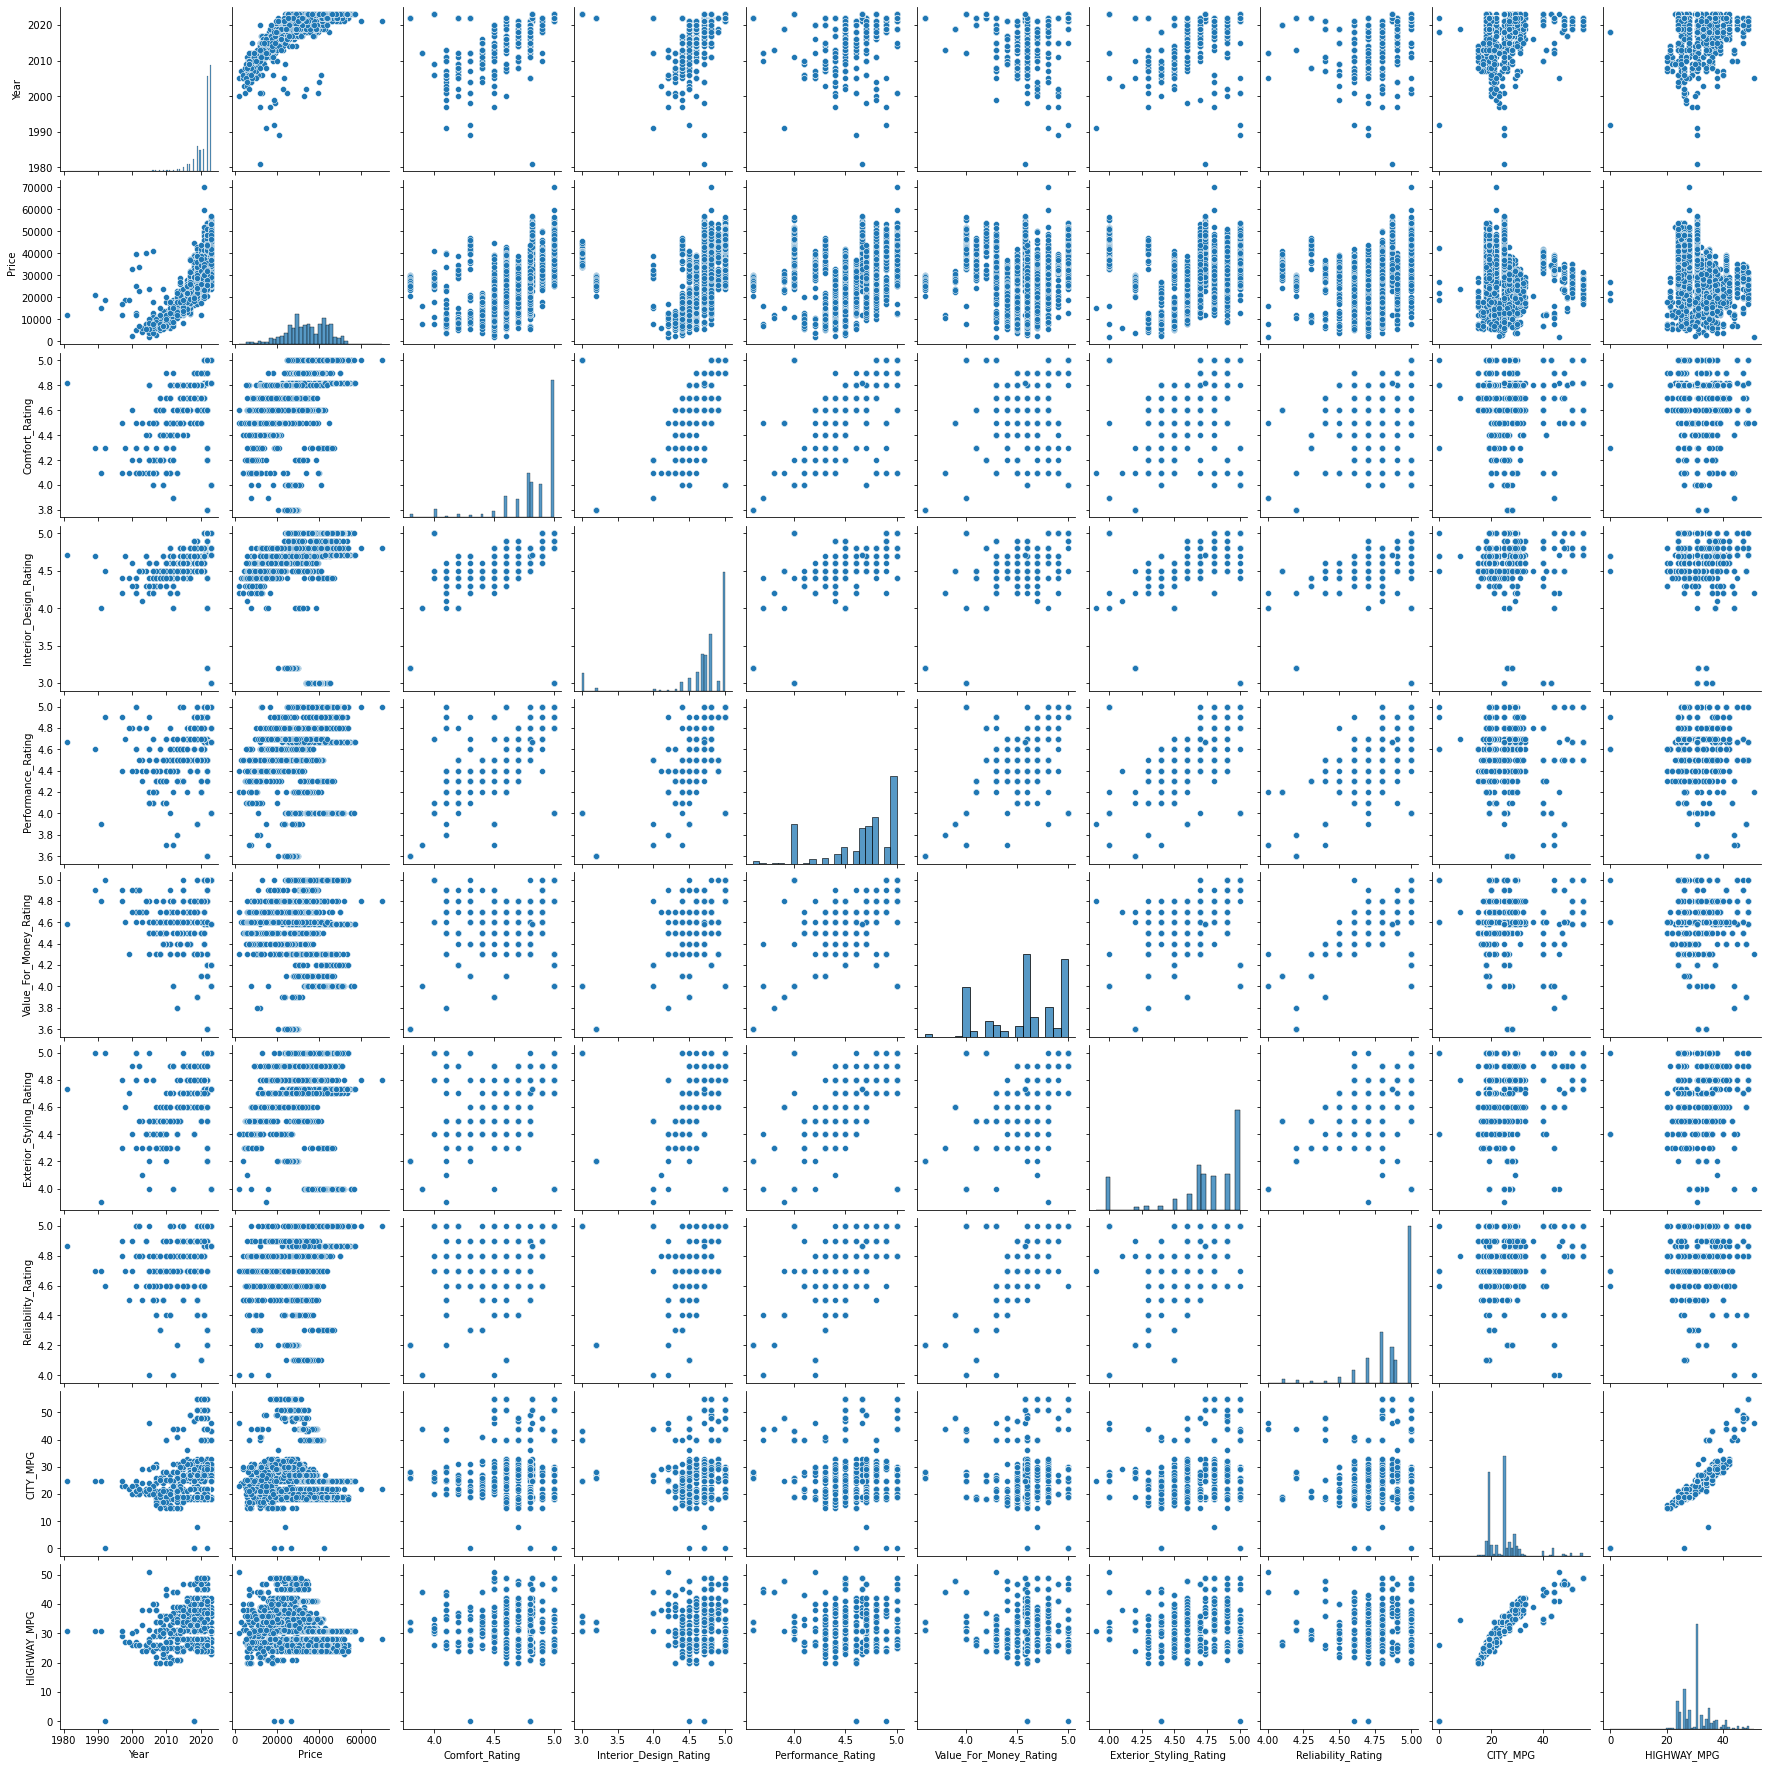

In [26]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df)
plt.show()

### Fuel Type

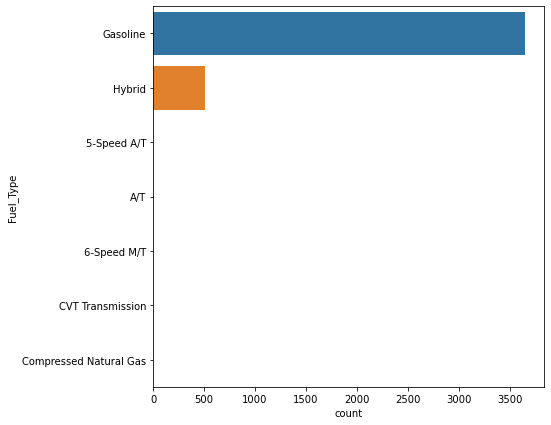

In [27]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,y=df['Fuel_Type'])
plt.show()

### Condition of car

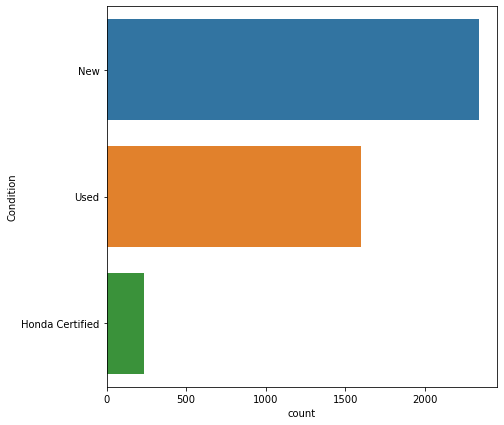

In [28]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,y=df['Condition'])
plt.show()

### Price

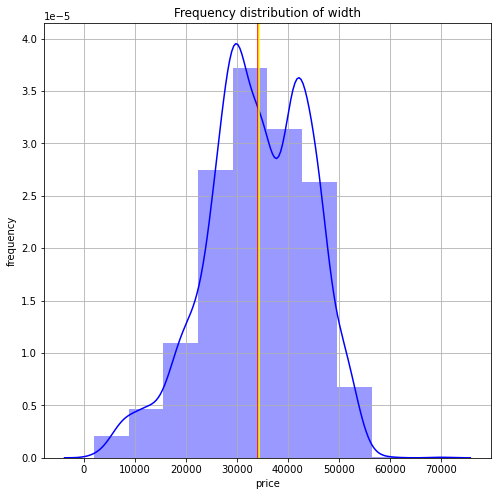

In [29]:
price_mean=df['Price'].mean()
price_median=df['Price'].median()

plt.figure(figsize=(8,8))
sns.distplot(df['Price'],bins=10,hist=True,color='blue')
plt.title('Frequency distribution of width')
plt.xlabel('price')
plt.ylabel('frequency')
plt.axvline(price_mean,color='Red')
plt.axvline(price_median,color='Yellow')
plt.grid()
plt.show()

### Exterior Color

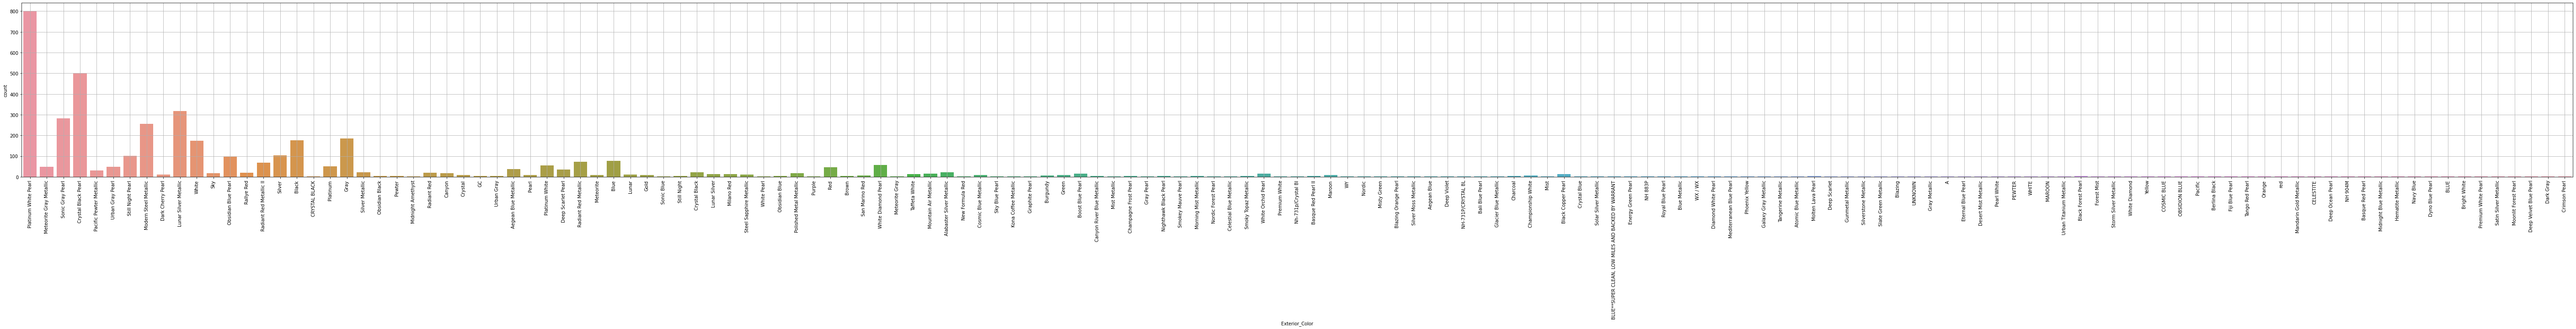

In [30]:
plt.figure(figsize=(100,7))
sns.countplot(data=df,x=df['Exterior_Color'])
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Interior Color

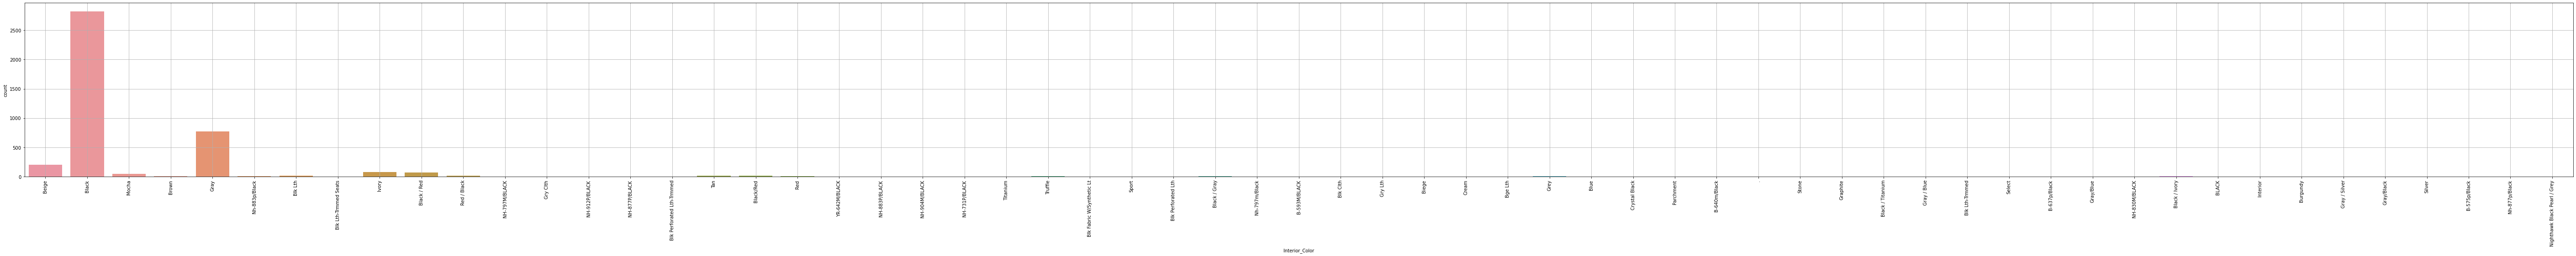

In [31]:
plt.figure(figsize=(100,7))
sns.countplot(data=df,x=df['Interior_Color'])
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Comfort Rating

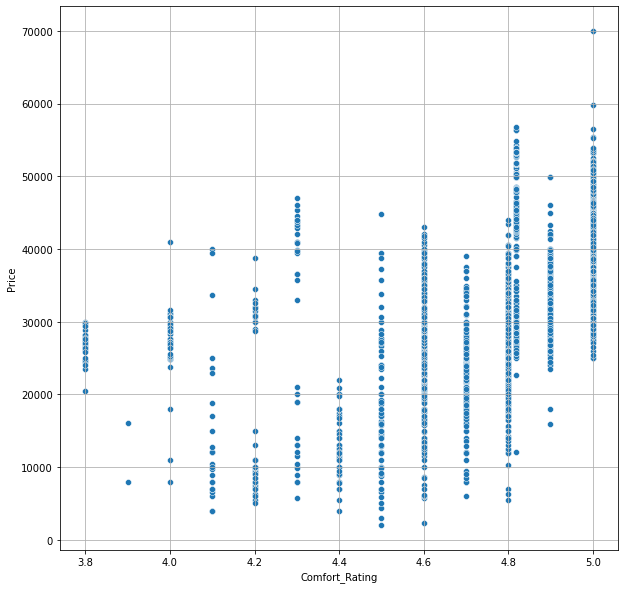

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x=df['Comfort_Rating'],y=df['Price'])
plt.grid(True)
plt.show()

### PerformanceRating


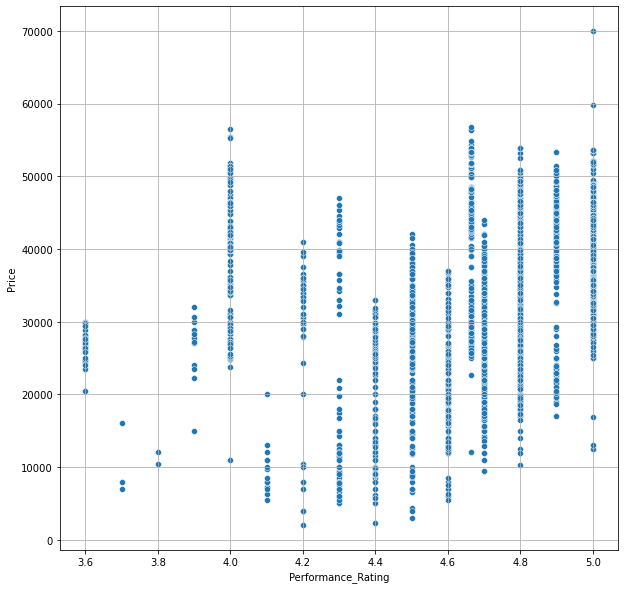

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x=df['Performance_Rating'],y=df['Price'])
plt.grid(True)
plt.show()

### State

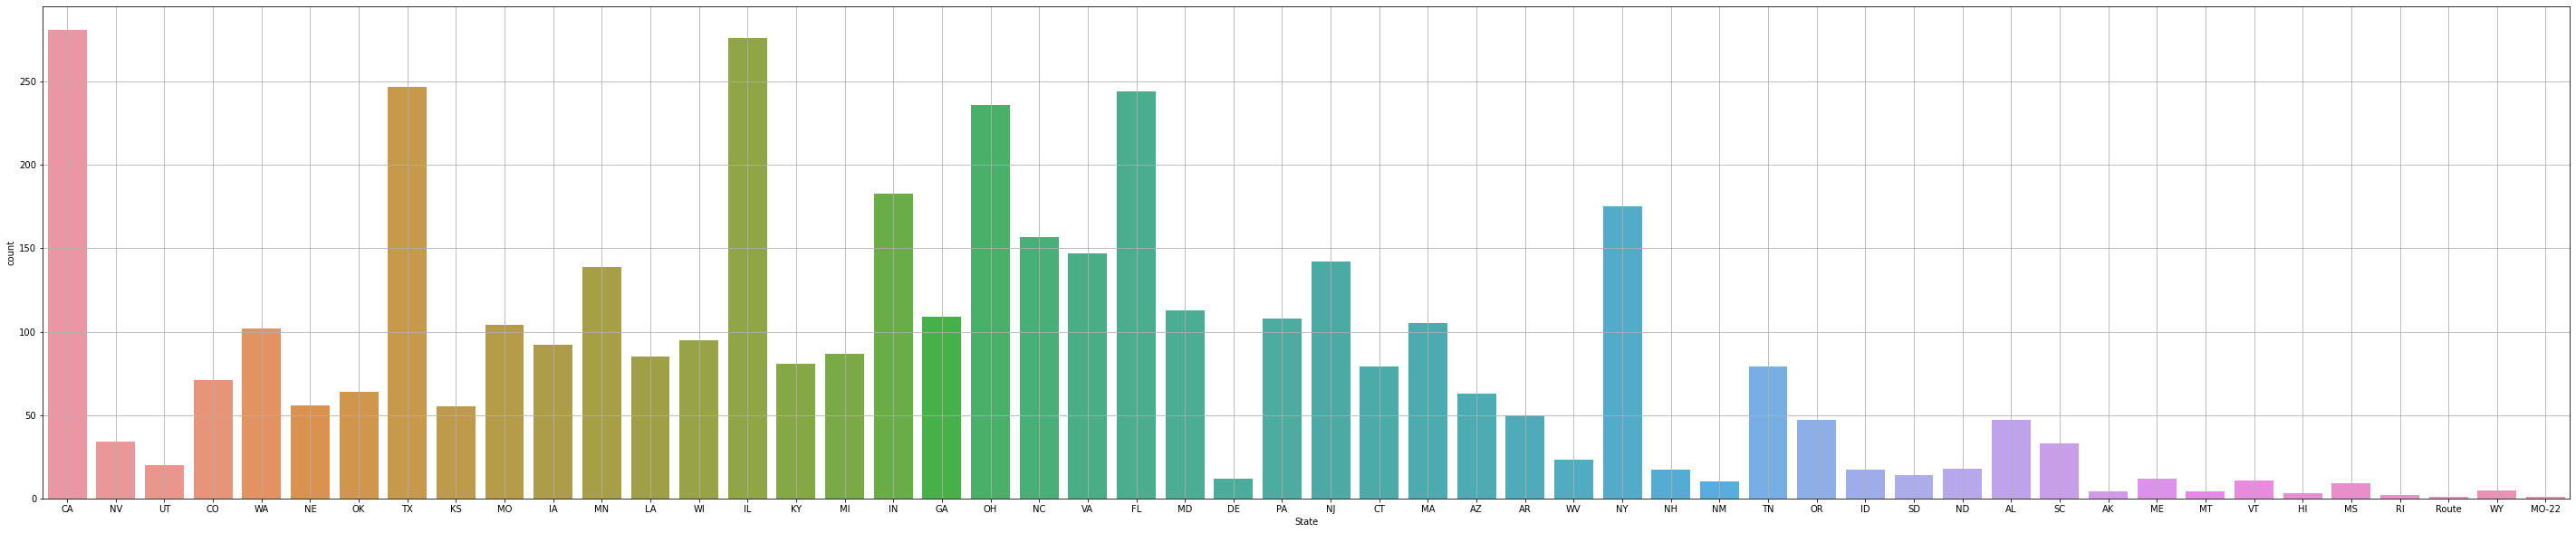

In [34]:
plt.figure(figsize=(50,10))
sns.countplot(data=df,x=df['State'])
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

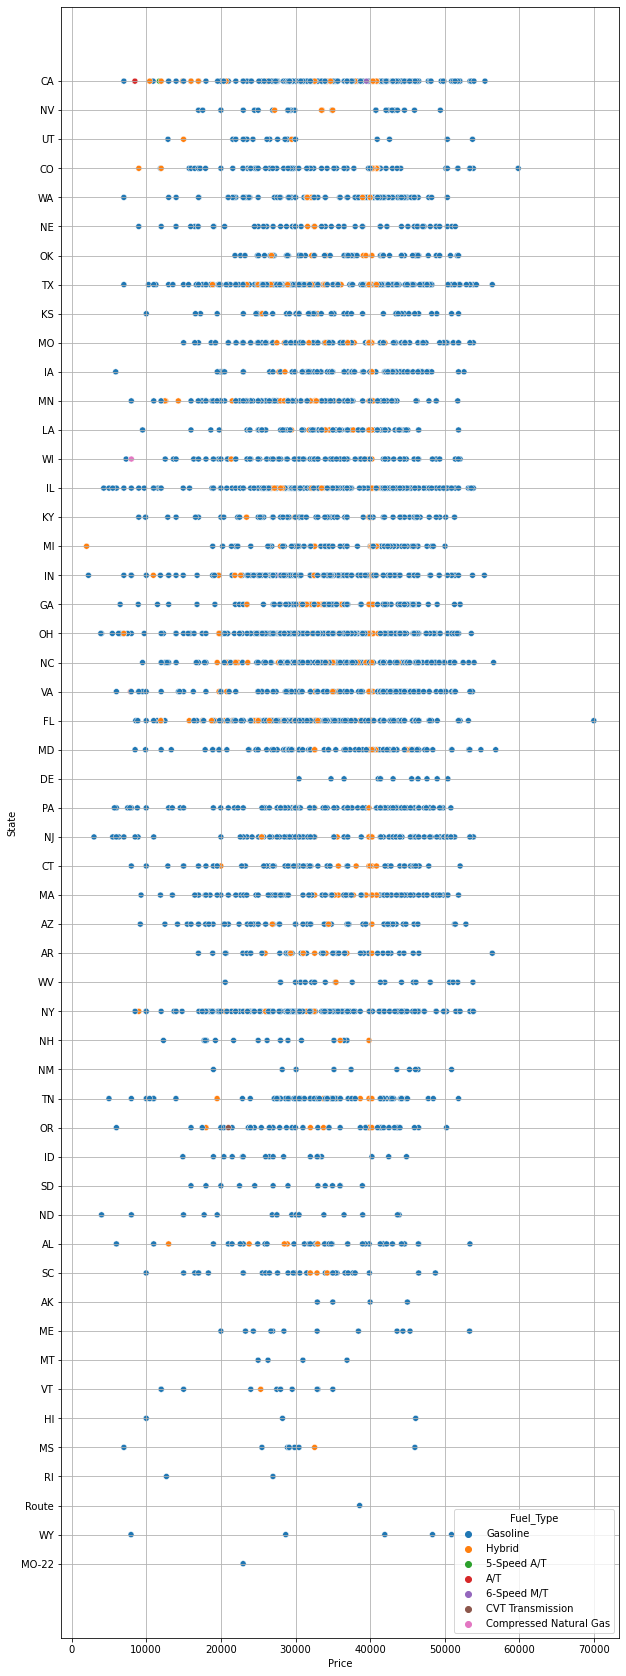

In [35]:
plt.figure(figsize=(10,30))
sns.scatterplot(data=df,x=df['Price'],y=df['State'],hue='Fuel_Type')
plt.grid(True)
plt.show()

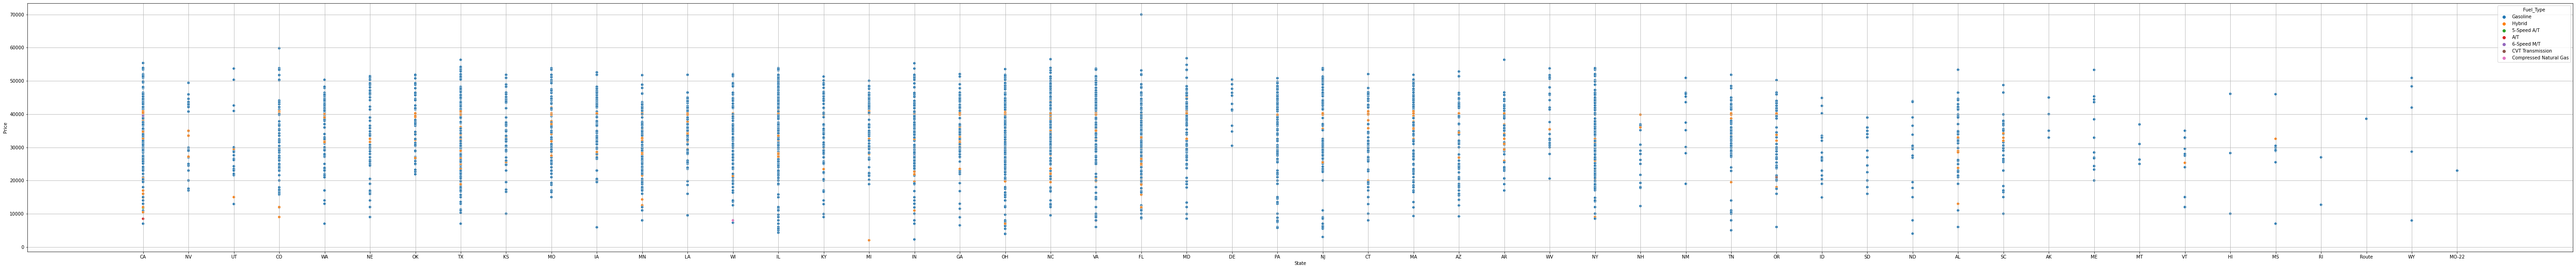

In [36]:
plt.figure(figsize=(100,10))
sns.scatterplot(data=df,x=df['State'],y=df['Price'],hue='Fuel_Type')
plt.grid(True)
plt.show()

### Performance Rating

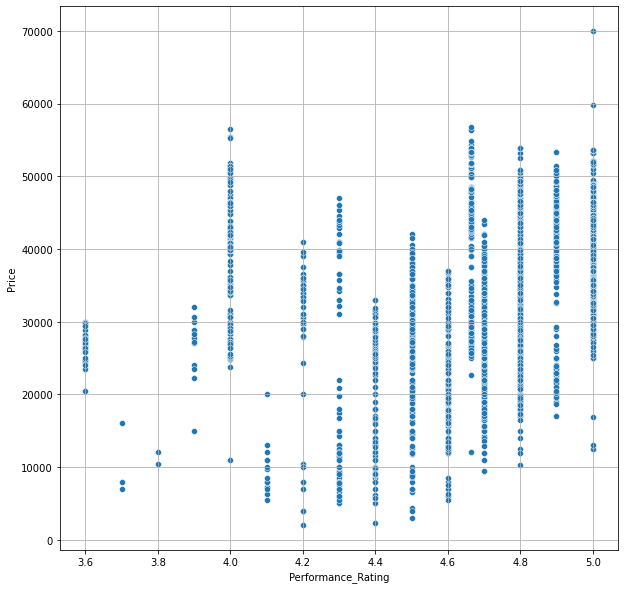

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x=df['Performance_Rating'],y=df['Price'])
plt.grid(True)
plt.show()

### CITY MPG

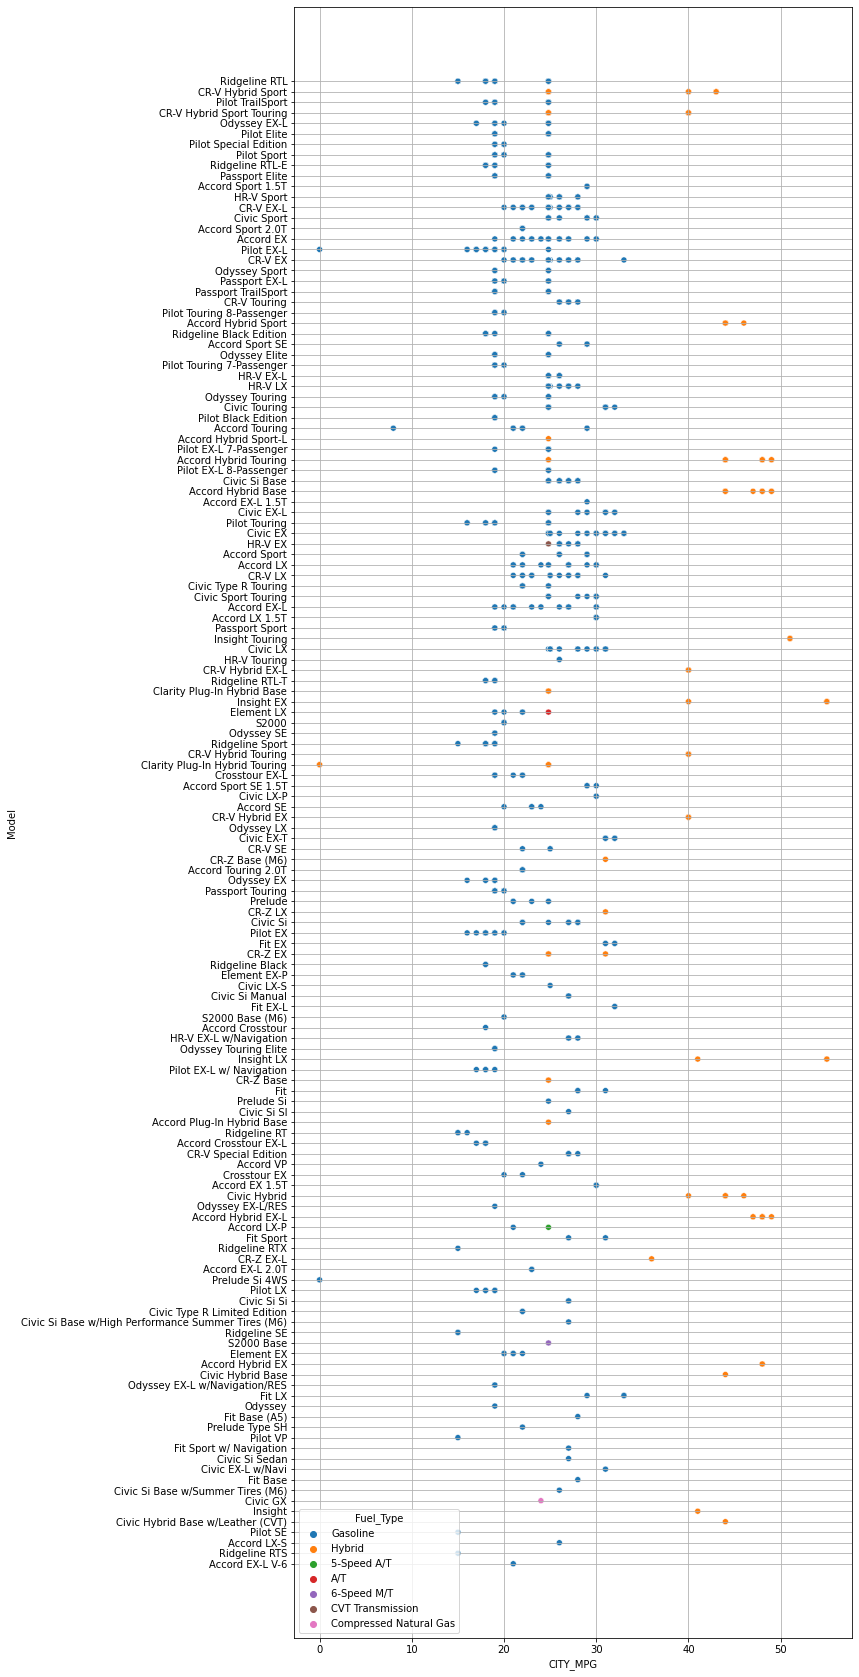

In [38]:
plt.figure(figsize=(10,30))
sns.scatterplot(data=df,x=df['CITY_MPG'],y=df['Model'],hue='Fuel_Type')
plt.grid(True)
plt.show()

### HIGHWAY MPG

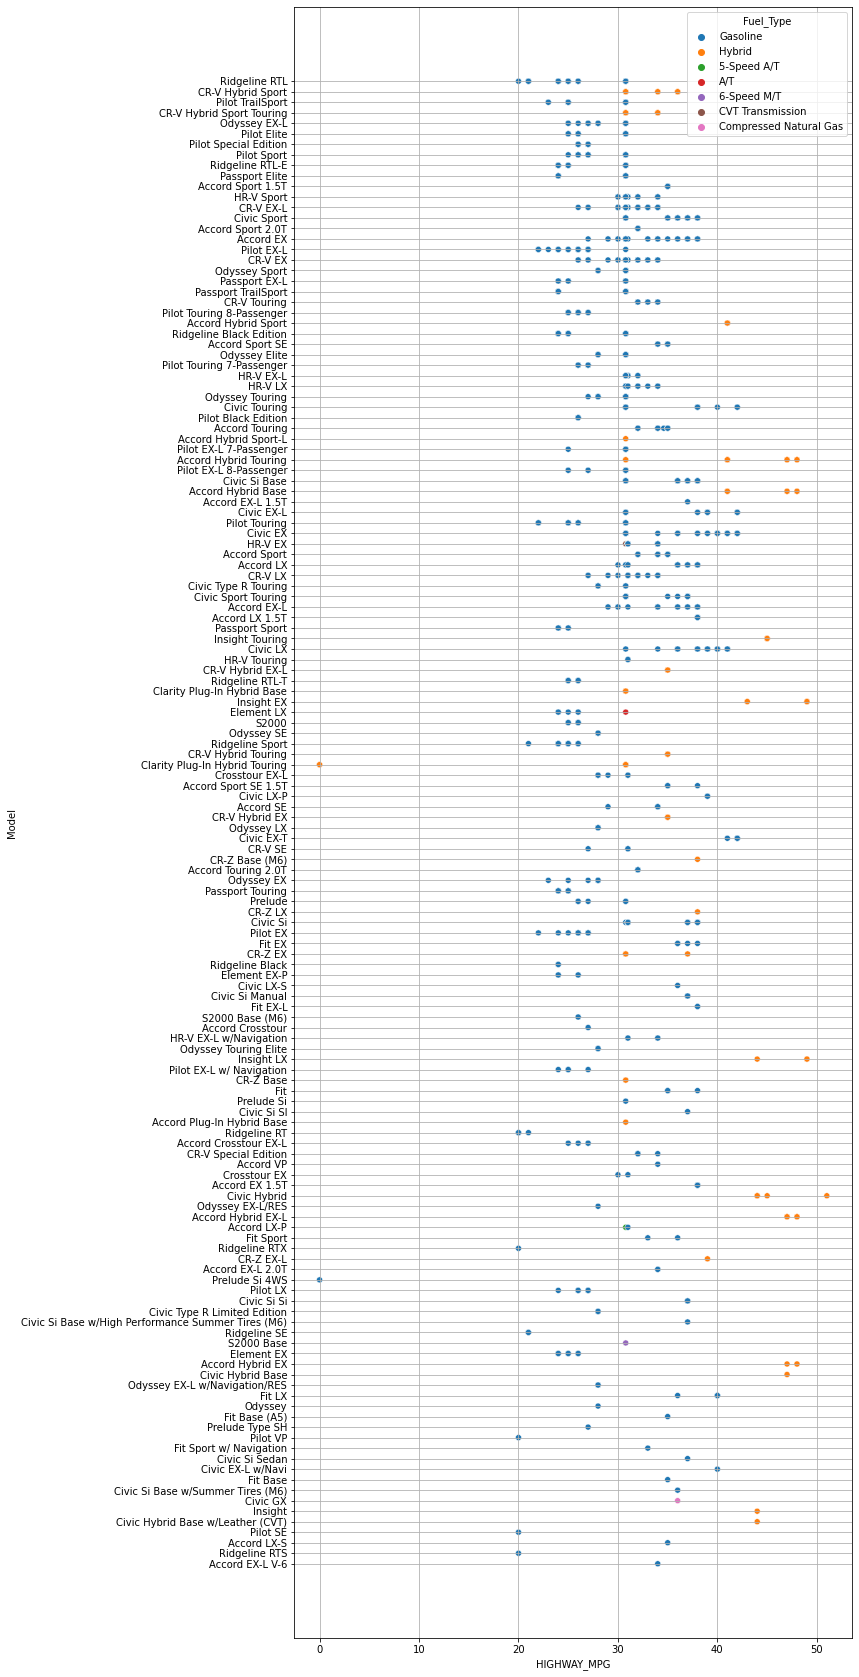

In [39]:
plt.figure(figsize=(10,30))
sns.scatterplot(data=df,x=df['HIGHWAY_MPG'],y=df['Model'],hue='Fuel_Type')
plt.grid(True)
plt.show()

### Heat Map

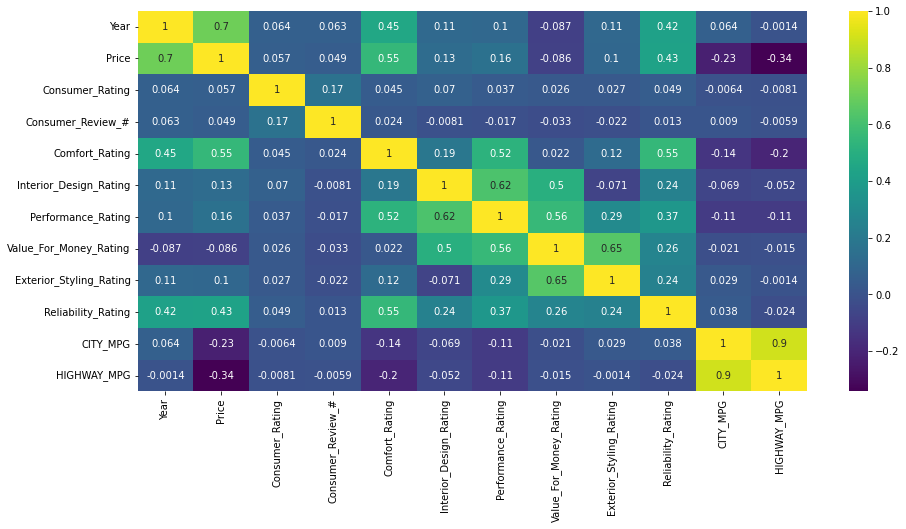

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

## Handling Outliers

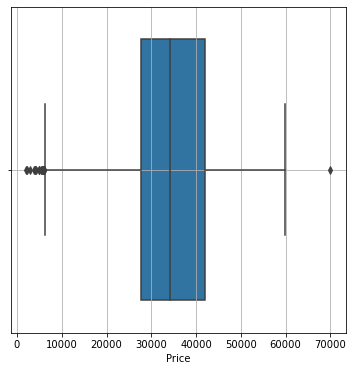

In [41]:
plt.figure(figsize=(6,6))
sns.boxplot(data=feature,x=target)
plt.grid()
plt.show()

#### Box Plot

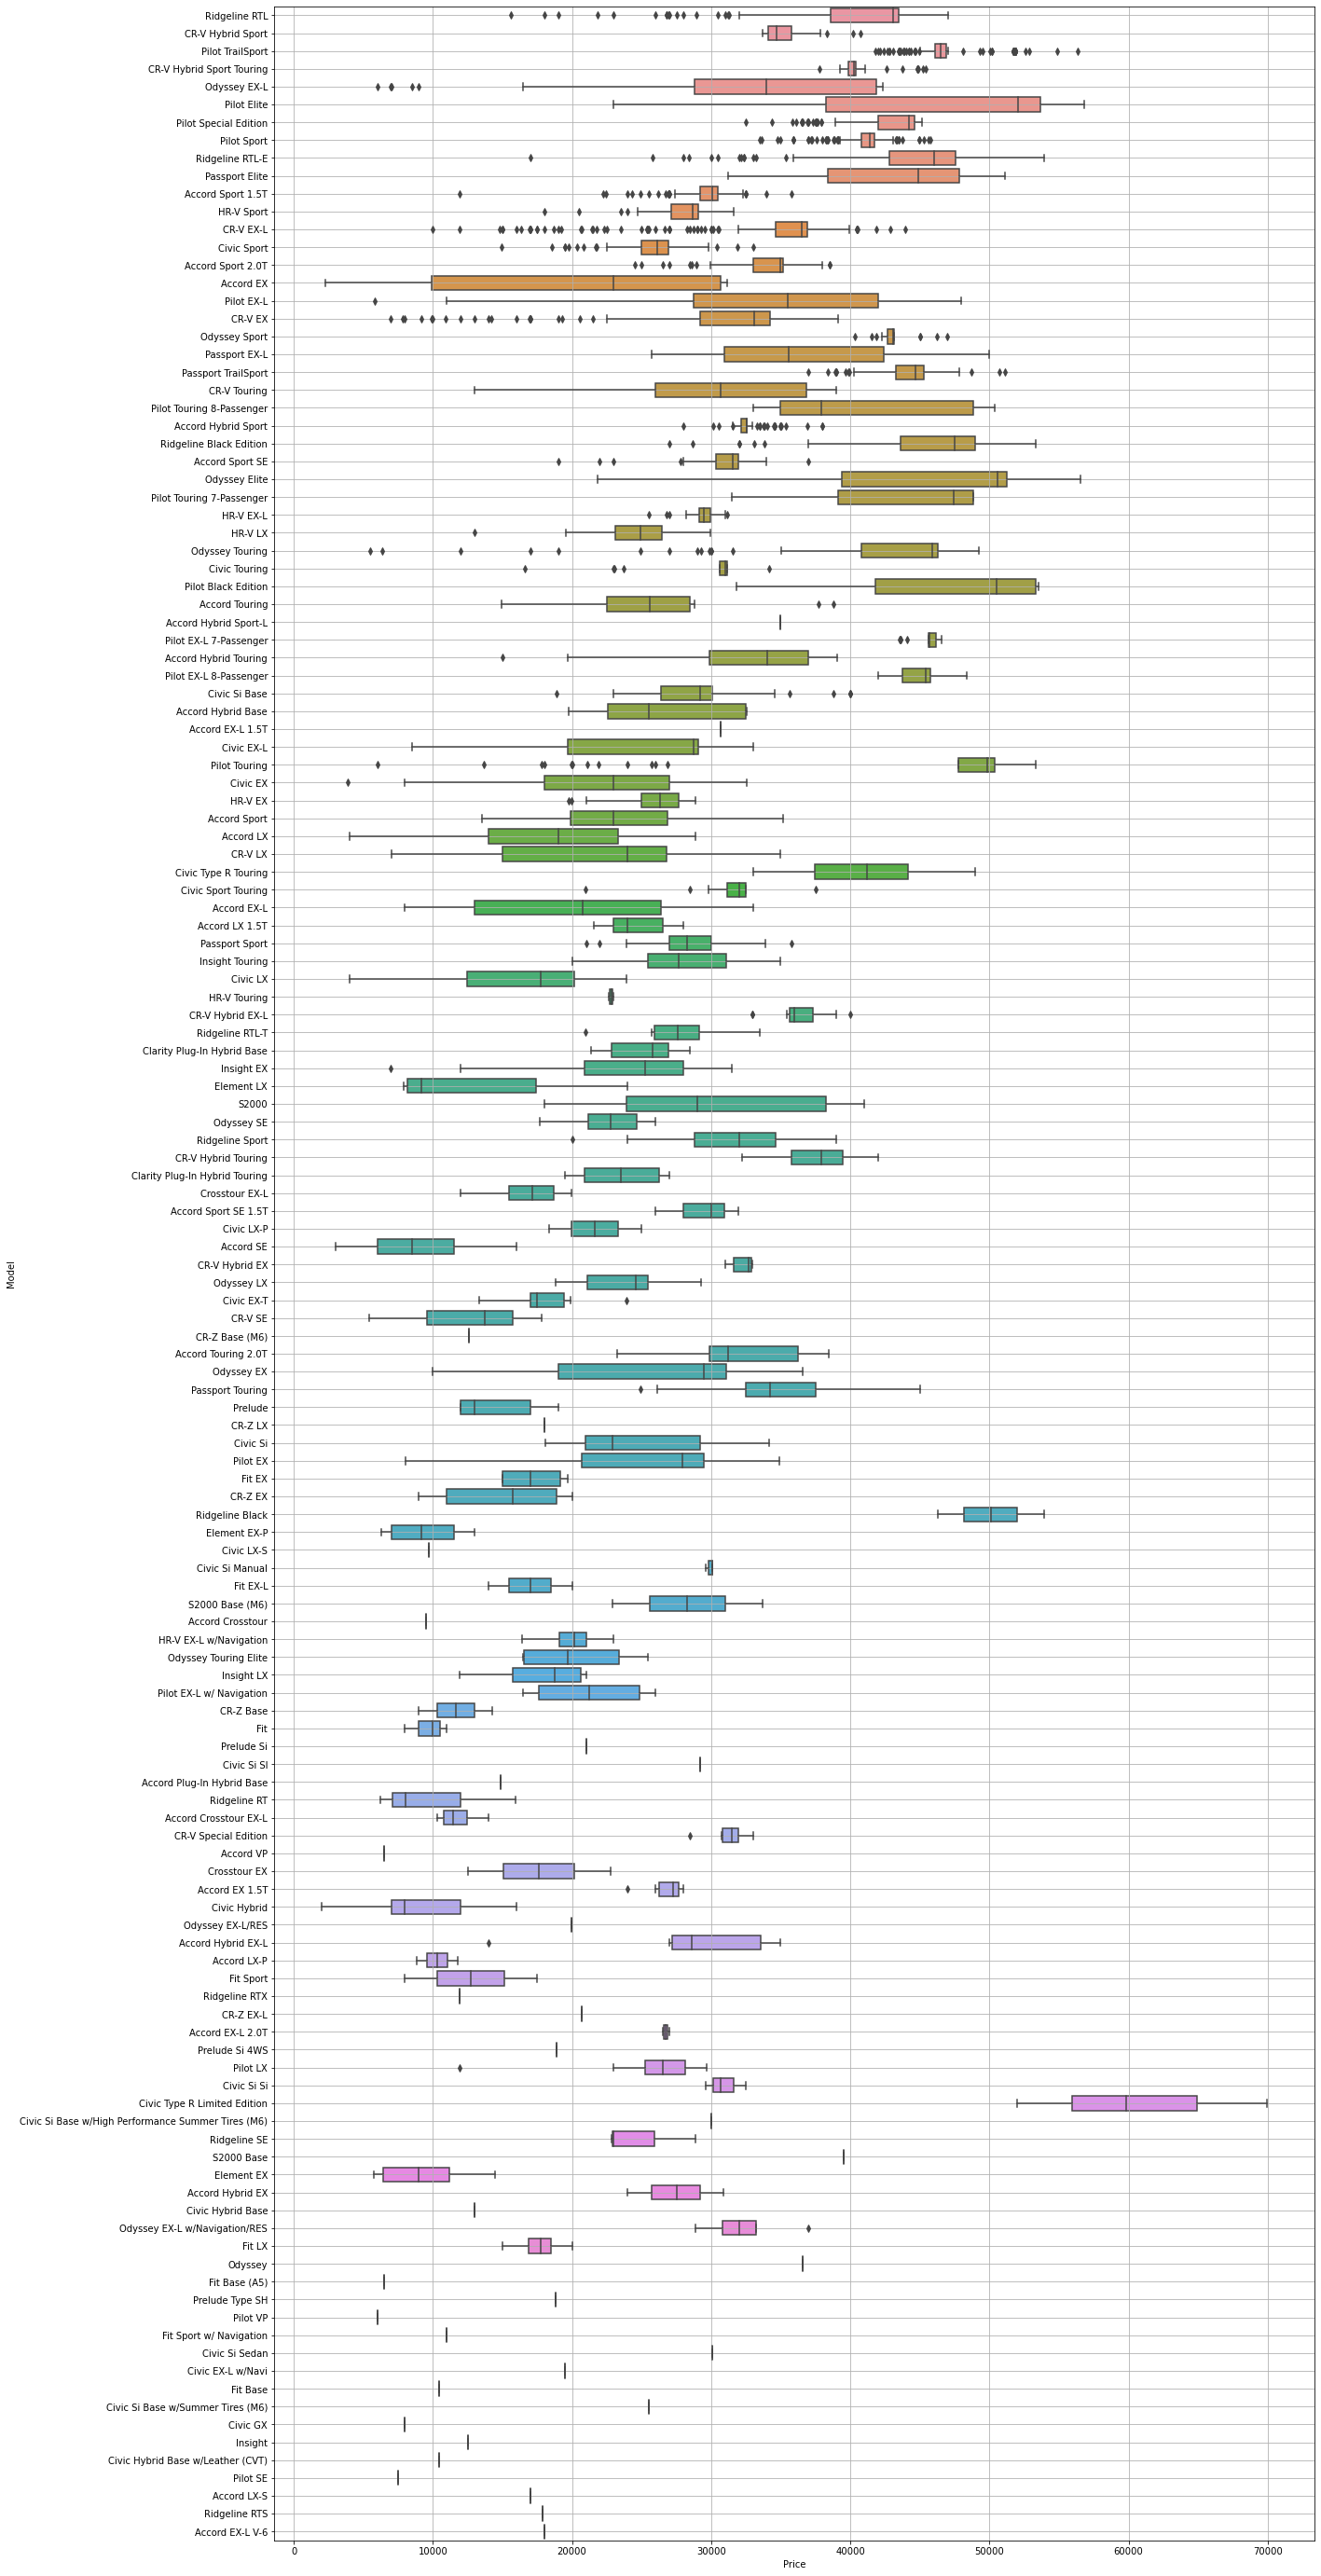

In [42]:
plt.figure(figsize=(20,50))
sns.boxplot(data=feature,x=target,y='Model')
plt.grid()
plt.show()

#### As from the above data there are two many outliers if we remove the outlier we will left little data for analysis.Hence we are not removing the outliers


## Data Preparation For ML

### Separating Continous and Categorical Data

In [43]:
colname=feature.select_dtypes(['int64','float64']).columns
colname

Index(['Year', 'Comfort_Rating', 'Interior_Design_Rating',
       'Performance_Rating', 'Value_For_Money_Rating',
       'Exterior_Styling_Rating', 'Reliability_Rating', 'CITY_MPG',
       'HIGHWAY_MPG'],
      dtype='object')

In [44]:
catcol=feature.select_dtypes(object).columns
catcol

Index(['Model', 'Condition', 'Exterior_Color', 'Interior_Color', 'Drivetrain',
       'Fuel_Type', 'Transmission', 'Engine', 'State'],
      dtype='object')

### Checking Skewness

In [45]:
from scipy.stats import skew

In [46]:
feature[colname]

,Year,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,CITY_MPG,HIGHWAY_MPG
0,2023,5.00000,4.800000,4.800000,4.200000,5.000000,5.000000,24.819579,30.777348
1,2023,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,24.819579,30.777348
2,2023,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,24.819579,30.777348
3,2022,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,19.000000,25.000000
4,2023,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,24.819579,30.777348
...,...,...,...,...,...,...,...,...,...
4994,2018,4.80000,4.800000,4.700000,4.700000,4.800000,4.800000,29.000000,35.000000
4995,2020,4.70000,4.600000,4.700000,4.800000,4.500000,4.800000,33.000000,40.000000
4996,2018,4.70000,4.700000,4.800000,4.800000,4.900000,4.800000,29.000000,38.000000
4997,2011,4.40000,4.500000,4.400000,4.600000,4.500000,4.800000,20.000000,30.000000


Year
-3.1260675518589447


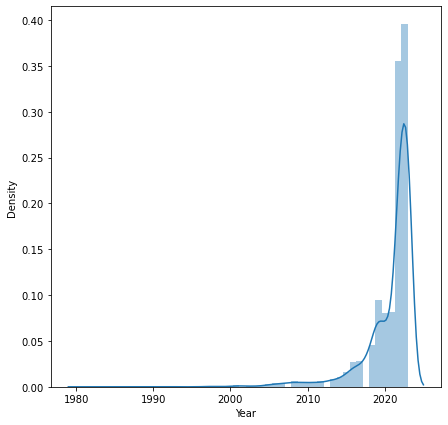

Comfort_Rating
-2.112589736146339


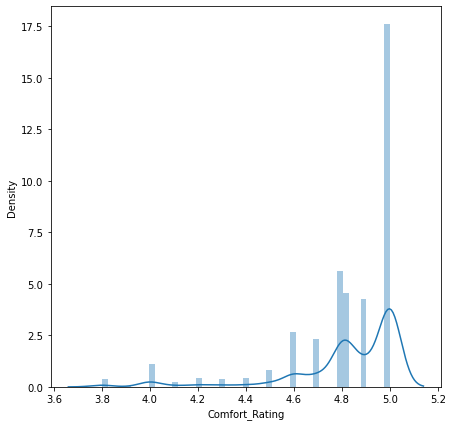

Interior_Design_Rating
-2.792095996712577


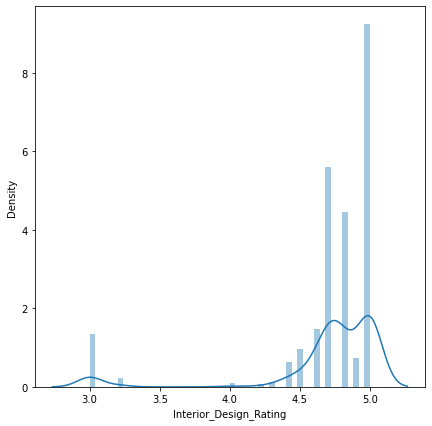

Performance_Rating
-1.0670751324448167


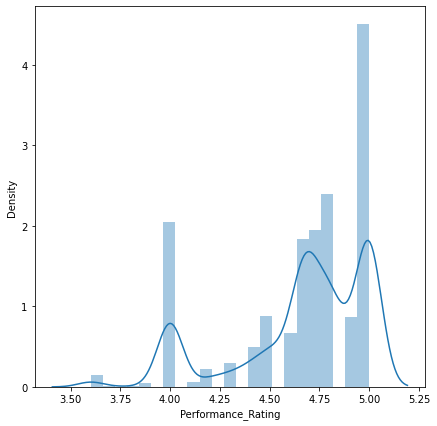

Value_For_Money_Rating
-0.5373391745768331


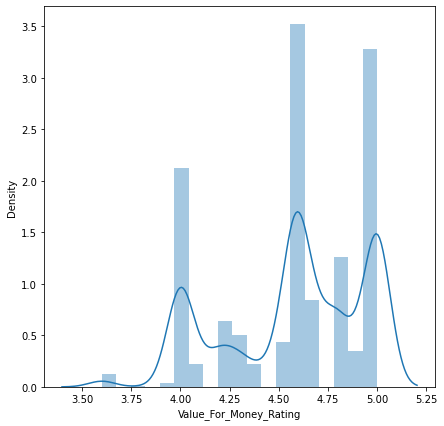

Exterior_Styling_Rating
-1.384364288864109


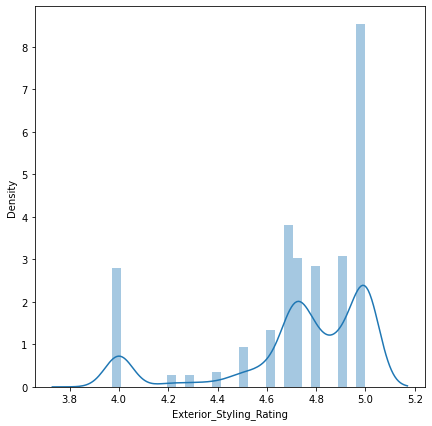

Reliability_Rating
-2.0188338865222755


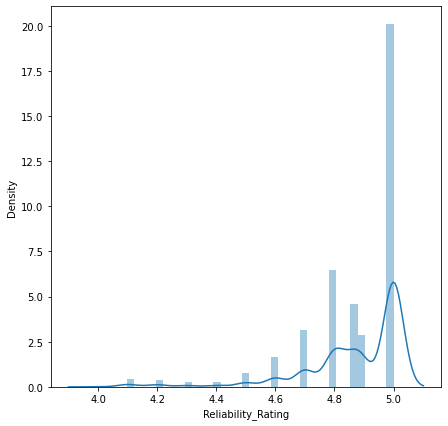

CITY_MPG
1.9127412127327956


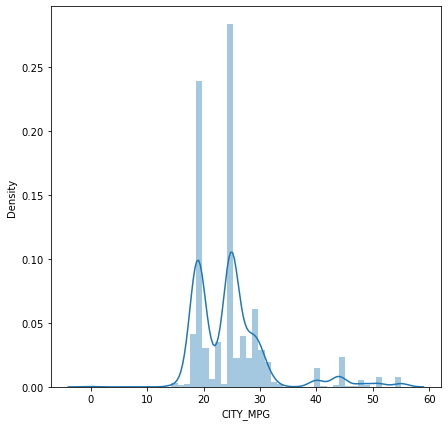

HIGHWAY_MPG
0.7863769693573253


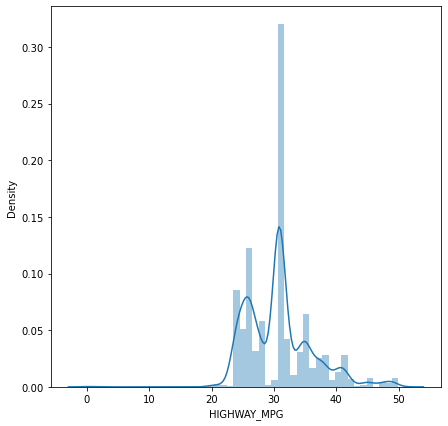

In [47]:
for i in feature[colname]:
    print(i)
    print(skew(feature[i]))
    
    plt.figure(figsize=(7,7))
    sns.distplot(feature[i],hist=True)
    plt.show()

In [48]:
pd.concat([feature,target],axis=1).corr()

,Year,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,CITY_MPG,HIGHWAY_MPG,Price
Year,1.000000,0.434488,0.085766,0.083890,-0.094261,0.095691,0.430739,0.062225,-0.017652,0.700022
Comfort_Rating,0.434488,1.000000,0.170910,0.510915,0.016882,0.111658,0.555231,-0.137494,-0.209459,0.542283
Interior_Design_Rating,0.085766,0.170910,1.000000,0.624490,0.512381,-0.087119,0.226983,-0.081187,-0.058884,0.112066
Performance_Rating,0.083890,0.510915,0.624490,1.000000,0.561778,0.276922,0.350525,-0.112537,-0.112883,0.139686
Value_For_Money_Rating,-0.094261,0.016882,0.512381,0.561778,1.000000,0.642613,0.252438,-0.029367,-0.018538,-0.092464
Exterior_Styling_Rating,0.095691,0.111658,-0.087119,0.276922,0.642613,1.000000,0.236027,0.021224,-0.010474,0.087875
Reliability_Rating,0.430739,0.555231,0.226983,0.350525,0.252438,0.236027,1.000000,0.027522,-0.037018,0.439008
CITY_MPG,0.062225,-0.137494,-0.081187,-0.112537,-0.029367,0.021224,0.027522,1.000000,0.907577,-0.236136
HIGHWAY_MPG,-0.017652,-0.209459,-0.058884,-0.112883,-0.018538,-0.010474,-0.037018,0.907577,1.000000,-0.364768
Price,0.700022,0.542283,0.112066,0.139686,-0.092464,0.087875,0.439008,-0.236136,-0.364768,1.000000


### Converting Categorical Data into Continous Data

In [49]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [50]:
feature[catcol] = oe.fit_transform(feature[catcol])
feature

,Year,Model,Condition,Exterior_Color,Interior_Color,Drivetrain,Fuel_Type,Transmission,Engine,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,CITY_MPG,HIGHWAY_MPG
0,2023,132.0,1.0,107.0,6.0,1.0,5.0,29.0,41.0,5.00000,4.800000,4.800000,4.200000,5.000000,5.000000,4.0,24.819579,30.777348
1,2023,32.0,1.0,107.0,9.0,2.0,6.0,31.0,22.0,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,4.0,24.819579,30.777348
2,2023,32.0,1.0,72.0,9.0,4.0,6.0,31.0,22.0,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,4.0,24.819579,30.777348
3,2022,123.0,1.0,131.0,9.0,1.0,5.0,26.0,41.0,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.0,19.000000,25.000000
4,2023,33.0,1.0,35.0,9.0,1.0,6.0,31.0,22.0,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,4.0,24.819579,30.777348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2018,20.0,2.0,146.0,9.0,4.0,5.0,31.0,4.0,4.80000,4.800000,4.700000,4.700000,4.800000,4.800000,34.0,29.000000,35.000000
4995,2020,80.0,2.0,116.0,9.0,4.0,5.0,31.0,3.0,4.70000,4.600000,4.700000,4.800000,4.500000,4.800000,34.0,33.000000,40.000000
4996,2018,63.0,2.0,149.0,6.0,4.0,5.0,22.0,4.0,4.70000,4.700000,4.800000,4.800000,4.900000,4.800000,6.0,29.000000,38.000000
4997,2011,4.0,2.0,11.0,9.0,4.0,5.0,17.0,42.0,4.40000,4.500000,4.400000,4.600000,4.500000,4.800000,18.0,20.000000,30.000000


## Scaling the Data

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
feature.iloc[:,:] = sc.fit_transform(feature.iloc[:,:])
feature

,Year,Model,Condition,Exterior_Color,Interior_Color,Drivetrain,Fuel_Type,Transmission,Engine,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,CITY_MPG,HIGHWAY_MPG
0,0.653404,1.355753,-0.566392,0.554865,-0.818505,-0.955553,-0.327409,0.317487,0.671993,0.719376,0.208913,0.405473,-1.052348,0.886838,0.723652,-1.347677,-0.003932,-0.004065
1,0.653404,-1.080628,-0.566392,0.554865,-0.523055,-0.290050,2.469655,0.538640,-0.464049,0.719376,-3.617309,-1.953089,-1.611071,0.886838,0.723652,-1.347677,-0.003932,-0.004065
2,0.653404,-1.080628,-0.566392,-0.302069,-0.523055,1.040956,2.469655,0.538640,-0.464049,0.719376,-3.617309,-1.953089,-1.611071,0.886838,0.723652,-1.347677,-0.003932,-0.004065
3,0.372285,1.136479,-0.566392,1.142477,-0.523055,-0.955553,-0.327409,-0.014243,0.671993,0.719376,0.634049,0.995113,1.182542,0.886838,0.723652,-1.347677,-0.837737,-1.097789
4,0.653404,-1.056264,-0.566392,-1.207971,-0.523055,-0.955553,2.469655,0.538640,-0.464049,0.719376,-3.617309,-1.953089,-1.611071,0.886838,0.723652,-1.347677,-0.003932,-0.004065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,-0.752190,-1.372993,1.167299,1.509735,-0.523055,1.040956,-0.327409,0.538640,-1.540300,-0.093114,0.208913,0.110653,0.344458,0.221714,-0.396240,0.706957,0.595022,0.795336
4995,-0.189953,0.088835,1.167299,0.775220,-0.523055,1.040956,-0.327409,0.538640,-1.600092,-0.499359,-0.216223,0.110653,0.623819,-0.775971,-0.396240,0.706957,1.168125,1.741898
4996,-0.752190,-0.325349,1.167299,1.583186,-0.818505,1.040956,-0.327409,-0.456549,-1.540300,-0.499359,-0.003655,0.405473,0.623819,0.554276,-0.396240,-1.210701,0.595022,1.363273
4997,-2.720023,-1.762814,1.167299,-1.795583,-0.523055,1.040956,-0.327409,-1.009432,0.731785,-1.718095,-0.428791,-0.773808,0.065097,-0.775971,-0.396240,-0.388848,-0.694461,-0.151226


## Building ML Model


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size=0.3,random_state=1)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()


In [55]:
def mymodel(model):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)

    print('MAE : ',mae)
    print('MSE : ',mse)
    print('RMSE : ',rmse)
    print('Accuracy : ',r2)
    return model

In [56]:
mymodel(rf)

MAE :  1449.899827544314
MSE :  4841163.660442549
RMSE :  2200.2644523880645
Accuracy :  0.9493817621458827


RandomForestRegressor()

In [57]:
train=rf.score(X_train,y_train)
test=rf.score(X_test,y_test)

print(f'Training score -: {train}')
print(f'Testing score -: {test}') 

Training score -: 0.9922914886964497
Testing score -: 0.9493817621458827


## Prediction

In [58]:
def predict():
    a1=eval(input('Enter Year of manufacturing  :'))
    a2=eval(input('Enter Model of car :'))
    a3=eval(input('Enter Condition of car New and Old  :'))
    a4=eval(input('Enter Exterior_Color of Car  :'))
    a5=eval(input('Enter Interior_Color of Car  :'))
    a6=eval(input('Enter Drivetrain of Car  :'))
    a7=eval(input('Enter Fuel_Type of Car :'))
    a8=eval(input('Enter Transmission  of Car :'))
    a9=eval(input('Enter Engine of Car :'))
    a10=eval(input('Enter Comfort_Rating of Car  :'))
    a11=eval(input('Enter Interior_Design_Rating of Car  :'))
    a12=eval(input('Enter Performance_Rating of Car :'))
    a13=eval(input('Enter Value_For_Money_Rating of Car  :'))
    a14=eval(input('Enter Exterior_Styling_Rating of Car :'))
    a15=eval(input('Enter Reliability_Rating of Car :'))
    a16=eval(input('Enter State  :'))
    a17=eval(input('Enter CITY_MPG  :'))
    a18=eval(input('Enter HIGHWAY_MPG  :'))

    
    newobs=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18]
    
    ans=rf.predict([newobs])[0]
    
    print('Price of Car is    : ',ans)

In [59]:
predict()

Enter Year of manufacturing  :2023
Enter Model of car :2
Enter Condition of car New and Old  :2
Enter Exterior_Color of Car  :10
Enter Interior_Color of Car  :11
Enter Drivetrain of Car  :7
Enter Fuel_Type of Car :8
Enter Transmission  of Car :9
Enter Engine of Car :9
Enter Comfort_Rating of Car  :10
Enter Interior_Design_Rating of Car  :10
Enter Performance_Rating of Car :10
Enter Value_For_Money_Rating of Car  :10
Enter Exterior_Styling_Rating of Car :10
Enter Reliability_Rating of Car :10
Enter State  :3
Enter CITY_MPG  :30
Enter HIGHWAY_MPG  :50
Price of Car is    :  41396.375
